In [29]:
import cv2

In [28]:
import os

In [9]:
# Directory with train waldo pictures
train_waldo_dir = os.path.join('/Users/jasminwrede/Documents/spiced_projects/final/find-wally-master/128/train_waldo')

# Directory with train notwaldo pictures
train_notwaldo_dir = os.path.join('/Users/jasminwrede/Documents/spiced_projects/final/find-wally-master/128/train_notwaldo')

# Directory with validation waldo pics
valid_waldo_dir = os.path.join('/Users/jasminwrede/Documents/spiced_projects/final/find-wally-master/128/valid_waldo')


# Directory with our validation not waldo pics
valid_notwaldo_dir = os.path.join('/Users/jasminwrede/Documents/spiced_projects/final/find-wally-master/128/valid_notwaldo')


In [15]:
train_waldo_names = os.listdir(train_waldo_dir)
print(train_waldo_names[:10])

train_notwaldo_names = os.listdir(train_notwaldo_dir)
print(train_notwaldo_names[:10])

valid_waldo_names = os.listdir(valid_waldo_dir)
print(valid_waldo_names[:10])

valid_notwaldo_names = os.listdir(valid_notwaldo_dir)
print(valid_notwaldo_names[:10])

['6_7_0.jpg', '.DS_Store', '5_3_1.jpg', '4_1_6.jpg', '5_1_2.jpg', '4_1_5.jpg', '7_6_2.jpg', '10_7_2.jpg', '1_2_3.jpg', '9_0_6.jpg']
['5_6_6.jpg', '4_4_1.jpg', '6_7_6.jpg', '7_5_1.jpg', '14_1_5.jpg', '5_4_4.jpg', '4_6_3.jpg', '6_5_4.jpg', '7_7_3.jpg', '4_0_5.jpg']
['17_6_2.jpg', '.DS_Store', '14_0_6.jpg', '17_1_5.jpg', '16_5_2.jpg', '13_1_5.jpg', '19_0_3.jpg', '12_1_6.jpg', '13_3_1.jpg', '18_7_3.jpg']
['14_3_7.jpg', '15_1_0.jpg', '17_2_7.jpg', '16_0_0.jpg', '20_0_2.jpg', '21_2_5.jpg', '15_3_2.jpg', '17_0_5.jpg', '16_2_2.jpg', '20_2_0.jpg']


In [16]:
print('total training waldo images:', len(os.listdir(train_waldo_dir)))
print('total training not waldo images:', len(os.listdir(train_notwaldo_dir)))
print('total validation waldo images:', len(os.listdir(valid_waldo_dir)))
print('total validation not waldo images:', len(os.listdir(valid_notwaldo_dir)))

total training waldo images: 16
total training not waldo images: 836
total validation waldo images: 13
total validation not waldo images: 483


In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#output images  10x10 configuration
nrows = 10
ncols = 10

# Index for iterating over images
pic_index = 0

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale the images
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/images/',  # This is the source directory for training images
        classes = ['waldo', 'notwaldo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/test_images/',  # This is the source directory for training images
        classes = ['waldo', 'notwaldo'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [45]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [46]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,200,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15360128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [51]:
history = model.fit(
       train_generator,
       steps_per_epoch=8,  
       epochs=15,
       verbose=1,
       validation_data = validation_generator,
      validation_steps=8)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [52]:
model.evaluate(validation_generator)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [53]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [54]:
## RATE OF FALSE POSITIVE AND TRUE PROSITIVE
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

NameError: name 'preds' is not defined

In [55]:
roc_auc = auc(fpr, tpr)

NameError: name 'fpr' is not defined

In [57]:
### PREDICTIONS TO TEST

In [56]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive-Rate')
plt.ylabel('True Positive.Rate')
plt.title('FPR AND TPR')
plt.legend(loc="lower right")
plt.show()

NameError: name 'fpr' is not defined

<Figure size 432x288 with 0 Axes>

In [40]:
import cv2

%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

TypeError: Image data of dtype <U1 cannot be converted to float

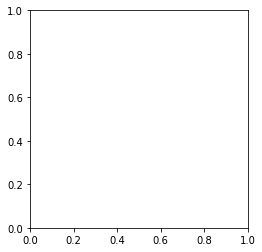

In [43]:
plt.imshow(train_waldo_dir[5])
plt.show

img.set_size_inches(18.5, 10.5, forward=True)

TypeError: Image data of dtype <U1 cannot be converted to float

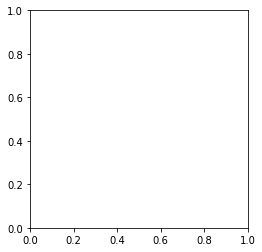

In [42]:
""" C++ was used for the programming of OpenCV. Here the colors are upside down: blue and green are swapped. 

Convert the color """

img2=cv2.imread(train_waldo_dir[5])
plt.imshow(img2[1::,1::,::-1]) 

g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(g)
plt.show

""""Matplotlib does not show it in gray but colors this a bit (makes sense for mathematical plots)"""

print(img.shape)
print(g.shape)

cv2.rectangle(img2, (200,200), (500,500), (0,0,255), 20)
plt.imshow(g, "gray")
plt.show

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, "gray")
plt.show()

In [ ]:
classifier = cv2.CascadeClassifier("build.xml")

In [38]:
faces = classifier.detectMultiScale(gray, minNeighbors=10)

print(faces)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-40fplvaz/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [37]:
c= img.copy()
for face in faces:
    x, y, w, h = face
    cv2.rectangle(c, (x, y), (x+w, y+h), (0, 255, 0), 10)
    print(face)

i = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
plt.imshow(i)
plt.show()

NameError: name 'faces' is not defined